# Execute the code below

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,-2,143,116,116,0,1,8.7,very bad,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,8,119,143,116,0,1,8.7,not good not bad,12,27
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,4,143,116,116,0,1,6.9,very bad,12,28
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,0,116,116,116,0,1,8.7,very bad,12,29
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,4,113,113,113,0,1,8.7,very bad,12,30


# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [5]:
# Complete x, y and z in the script below:
px.scatter_3d(x = 'MAX_TEMPERATURE_C',
              y = 'MIN_TEMPERATURE_C',
              z= 'SUNHOUR',
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

**Remember to save the result of your prediction in a new column 'predict'.**

In [8]:
# Your code here :

from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C','SUNHOUR']]
y = df_weather['SUNHOUR']


modelLR = LinearRegression().fit(X, y)

In [9]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)

coefficient : [1.57412035e-16 1.00000000e+00]
intercept : 0.0


In [13]:
df_weather['PREDICT'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']])

df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,PREDICT
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,116,143,176,0,1,5.1,very bad,1,1,5.1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,119,116,116,0,1,8.7,very bad,1,2,8.7
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,116,116,116,0,1,8.7,very bad,1,3,8.7
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,116,116,122,0,1,5.1,very bad,1,4,5.1
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,143,116,116,0,1,8.7,very bad,1,5,8.7


### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [14]:
# Your code here :
px.scatter_3d(x = 'PREDICT',
              y = 'MIN_TEMPERATURE_C',
              z= 'SUNHOUR',
              data_frame=df_weather)

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware :
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

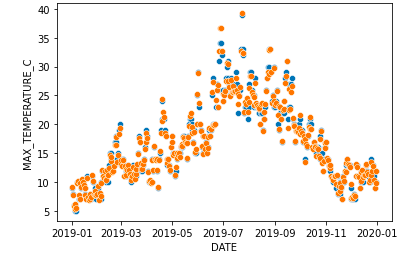

In [20]:
# Your code here :


from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C',	'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C',	'TEMPERATURE_EVENING_C',	'PRECIP_TOTAL_DAY_MM',	'HUMIDITY_MAX_PERCENT',	'VISIBILITY_AVG_KM', 'WEATHER_CODE_MORNING',	'WEATHER_CODE_NOON',	'WEATHER_CODE_EVENING',	'TOTAL_SNOW_MM',	'UV_INDEX', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']


modelLR = LinearRegression().fit(X, y)



You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [21]:
# Your code here :

# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)

#La colone avec le plus gros coefficient est la colonne TEMPERATURE_NOON_C. Ce qui a du sens puisque, tous les jours, le moment ou il fait le plus chaud est à midi.

coefficient : [ 4.07414215e-01 -2.63040362e-02 -2.35256476e-01  4.88012846e-01
  3.44439017e-01  1.82392499e-02 -3.30094575e-02  1.52269543e-02
 -4.87940405e-04 -7.09849338e-04 -2.63000685e-03  2.42861287e-17
 -4.83598843e-02  4.66190801e-02]
intercept : 6.042928559713479


In [22]:
df_weather['PREDICT2'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C',	'WINDSPEED_MAX_KMH', 'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C',	'TEMPERATURE_EVENING_C',	'PRECIP_TOTAL_DAY_MM',	'HUMIDITY_MAX_PERCENT',	'VISIBILITY_AVG_KM', 'WEATHER_CODE_MORNING',	'WEATHER_CODE_NOON',	'WEATHER_CODE_EVENING',	'TOTAL_SNOW_MM',	'UV_INDEX', 'SUNHOUR']])

df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,PREDICT,PREDICT2
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,143,176,0,1,5.1,very bad,1,1,5.1,9.246329
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,116,116,0,1,8.7,very bad,1,2,8.7,8.175946
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,116,116,0,1,8.7,very bad,1,3,8.7,5.715463
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,116,122,0,1,5.1,very bad,1,4,5.1,5.339581
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,116,116,0,1,8.7,very bad,1,5,8.7,5.663689


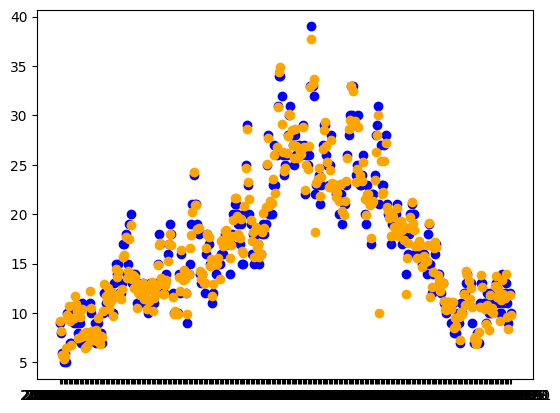

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'blue')
plt.scatter(x = df_weather["DATE"], y = df_weather["PREDICT2"], c= 'orange')
plt.show()